In [1]:
from qiskit import *

In [ ]:
IBMQ.save_account('')

In [5]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-03-16 17:08:42,659: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Two Quantum Registers

In [6]:
qr = QuantumRegister(2)

Two Classical Registers

In [7]:
cr = ClassicalRegister(2)

Circuit

In [8]:
circuit = QuantumCircuit(qr,cr)

In [9]:
%matplotlib inline

In [10]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [11]:
circuit.h(qr[0])

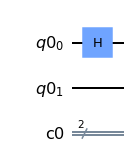

In [12]:
circuit.draw(output='mpl')

In [13]:
circuit.cx(qr[0],qr[1])

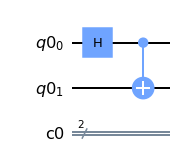

In [14]:
circuit.draw(output='mpl')

In [15]:
circuit.measure(qr,cr)

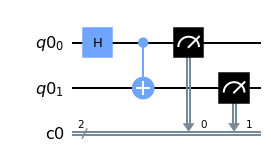

In [16]:
circuit.draw(output='mpl')

In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [18]:
res = execute(circuit,backend=simulator).result()

In [19]:
from qiskit.visualization import plot_histogram

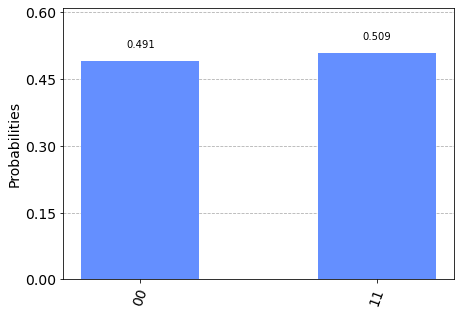

In [20]:
plot_histogram(res.get_counts(circuit))

In [21]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
qcomp = provider.get_backend('ibmq_manila')

In [23]:
job = execute(circuit,backend=qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job is queued (511)

In [45]:
result = job.result()

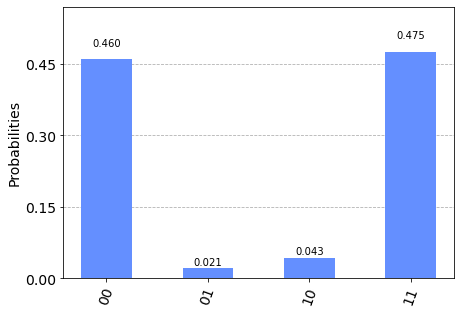

In [47]:
plot_histogram(result.get_counts(circuit))

In [10]:
from qiskit.visualization import plot_bloch_multivector

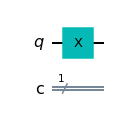

In [49]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
circuit.draw(output='mpl')

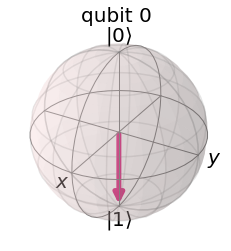

In [50]:
plot_bloch_multivector(statevector)

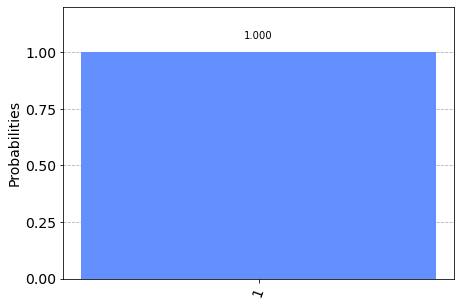

In [52]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=backend,shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


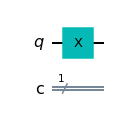

In [54]:
circuit = QuantumCircuit(2,2)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit,backend=simulator).result()
unitary = result.get_unitary()
print(unitary)
circuit.draw(output='mpl')

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


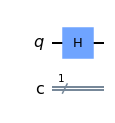

In [59]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector = result.get_statevector()
print(unitary)
circuit.draw(output='mpl')

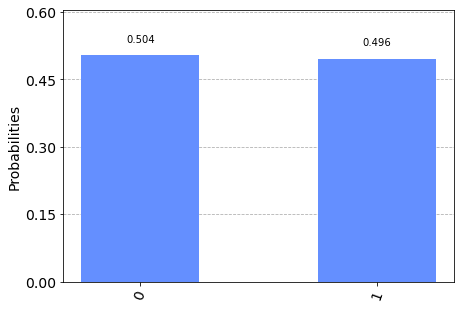

In [63]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=backend,shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

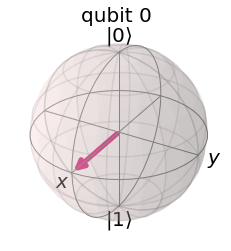

In [64]:
plot_bloch_multivector(statevector)

In [32]:
circuit = QuantumCircuit(3,3)


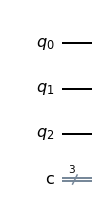

In [33]:
circuit.draw(output='mpl')

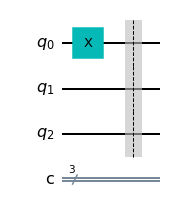

In [34]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

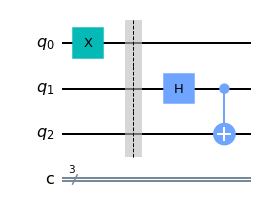

In [35]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

In [36]:
circuit.cx(0,1)
circuit.h(0)

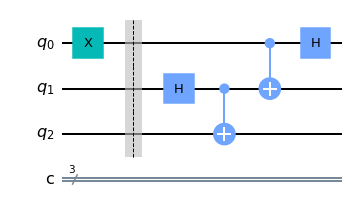

In [37]:
circuit.draw(output='mpl')

In [38]:
circuit.barrier()
circuit.measure([0,1],[0,1])

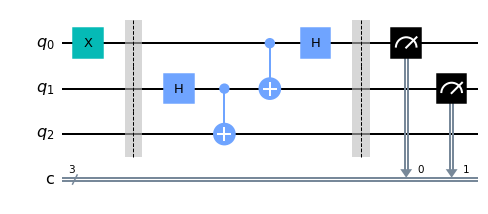

In [39]:
circuit.draw(output='mpl')

In [40]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)

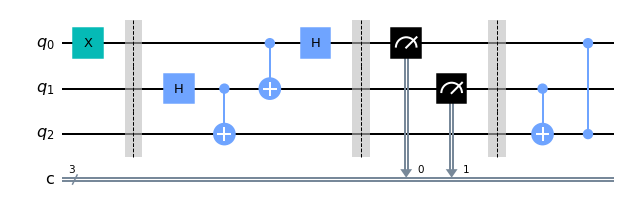

In [41]:
circuit.draw(output='mpl')

In [42]:
circuit.measure(2,2)

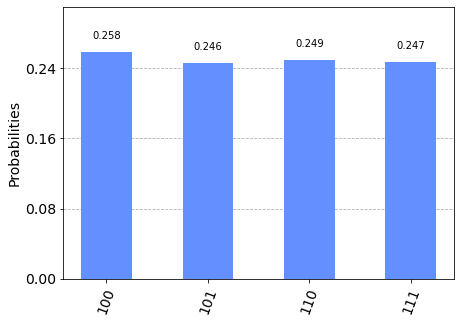

In [43]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [44]:
secretnumber = '101001'

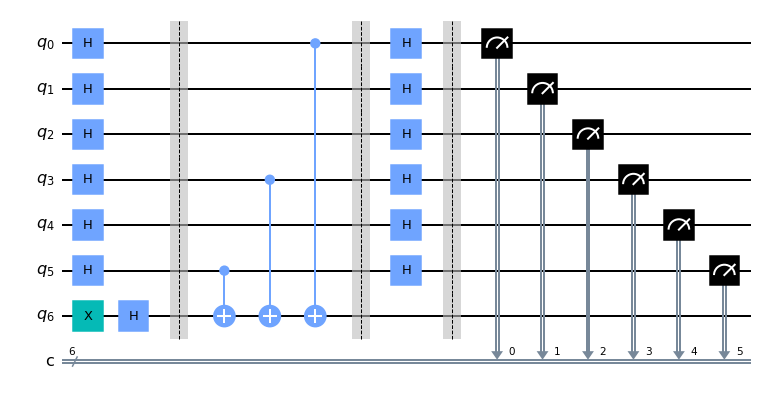

In [61]:
circuit = QuantumCircuit(6+1,6)
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output='mpl')

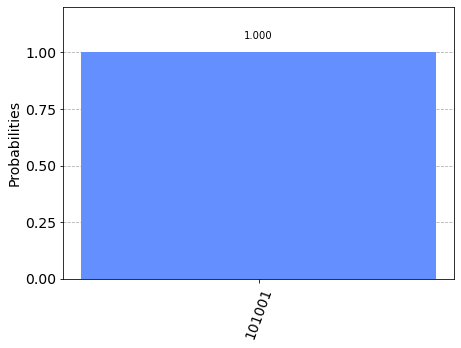

In [62]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)

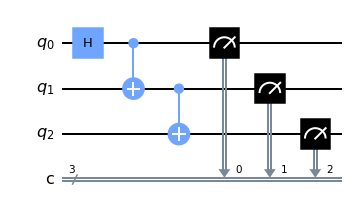

In [11]:
nq = 3
circuit = QuantumCircuit(nq,nq)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output='mpl')

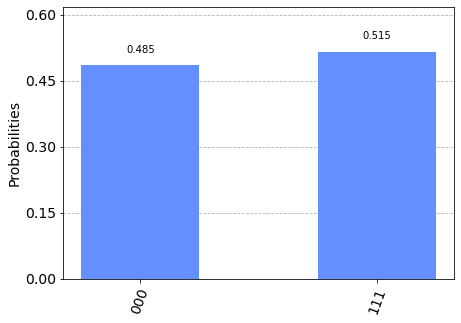

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [13]:
provider = IBMQ.get_provider(hub='ibm-q')

In [14]:
from qiskit.tools.monitor import backend_overview

In [15]:
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 815            Pending Jobs: 36             Pending Jobs: 35
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      149.5          Avg. T1:      118.2          Avg. T1:      113.5
Avg. T2:      54.8           Avg. T2:      116.3          Avg. T2:      99.3



ibmq_lima                   ibmq_bogota                  ibmq_armonk
---------                   -----------                  -----------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 19            Pending Jobs: 277            Pending Jobs: 27
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operationa

In [16]:
device = provider.get_backend('ibmq_lima')

In [17]:
job = execute(circuit,backend=device,shots=1024)
print(job.job_id())
job_monitor(job)

6221ddf2ba137262c643b32c
Job Status: job has successfully run


In [18]:
device_result = job.result()

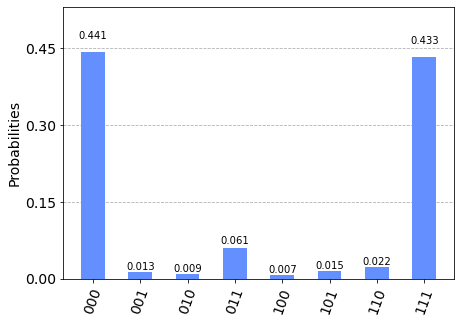

In [19]:
plot_histogram(device_result.get_counts(circuit))

In [24]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter 

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0],circlabel = 'measerrormitigationcal')

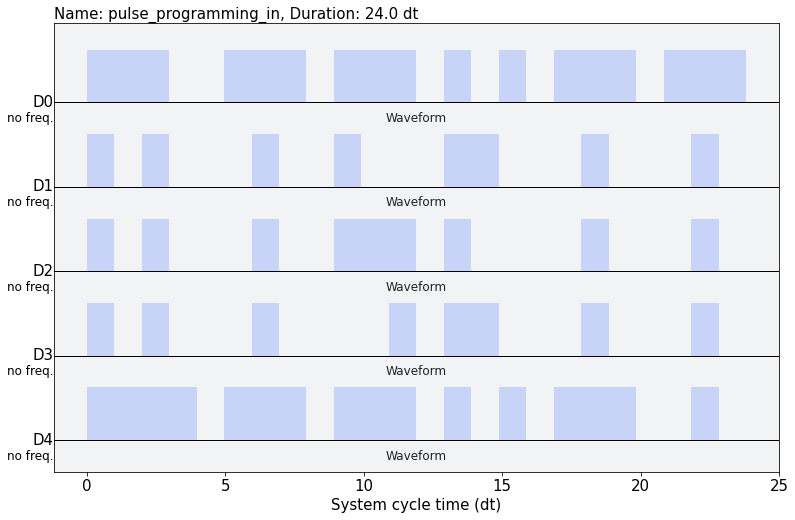

In [1]:
from qiskit import pulse

dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)

with pulse.build(name='pulse_programming_in') as pulse_prog:
    pulse.play([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], d0)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d1)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], d2)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d3)
    pulse.play([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], d4)

pulse_prog.draw()

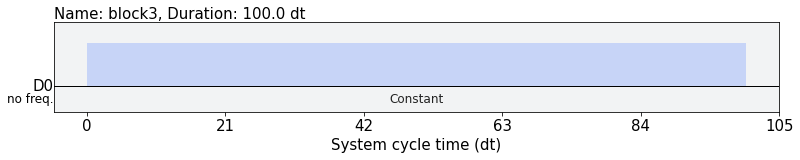

In [4]:
from qiskit import execute, pulse

d0 = pulse.DriveChannel(0)

with pulse.build() as pulse_prog:
    pulse.play(pulse.Constant(100, 1.0), d0)

pulse_prog.draw()

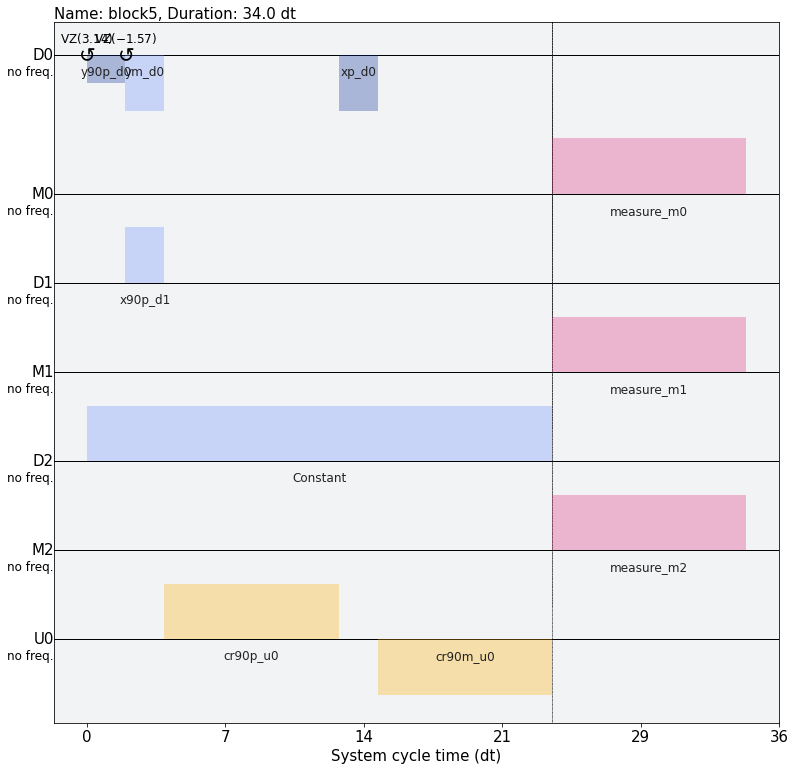

In [5]:
import math

from qiskit import pulse
from qiskit.test.mock import FakeOpenPulse3Q

# TODO: This example should use a real mock backend.
backend = FakeOpenPulse3Q()

d2 = pulse.DriveChannel(2)

with pulse.build(backend) as bell_prep:
    pulse.u2(0, math.pi, 0)
    pulse.cx(0, 1)

with pulse.build(backend) as decoupled_bell_prep_and_measure:
    # We call our bell state preparation schedule constructed above.
    with pulse.align_right():
        pulse.call(bell_prep)
        pulse.play(pulse.Constant(bell_prep.duration, 0.02), d2)
        pulse.barrier(0, 1, 2)
        registers = pulse.measure_all()

decoupled_bell_prep_and_measure.draw()